In [1]:
%matplotlib inline

In [2]:
import seaborn as sbn
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
nb_faculties = 9
acceptance_chance = 0.01
rejection_chance = 1-acceptance_chance

# Solution methods

In [4]:
def exact_solution(nb_events, event_chance):
    return event_chance**nb_events

In [5]:
def binomial_sample(nb_events, nb_trials, event_chance, sample_size=100000):
    sample = np.random.binomial(nb_trials, event_chance, sample_size)
    return (sample==nb_events).sum() / sample_size

In [6]:
def binomial(nb_events, nb_trials, event_chance):
    k, n, p = nb_events, nb_trials, event_chance
    def _factorial(n):
        return np.prod(range(1, n+1))
    n_f = math.factorial(n)
    k_f = math.factorial(k)
    n_k_f = math.factorial(n-k)
    
    proba_prod = p**k 
    proba_prod *= ((1-p)**(n-k))
    return n_f / (k_f*n_k_f) * proba_prod

# Solutions

Exact:

In [7]:
print(exact_solution(nb_faculties, rejection_chance))

0.9135172474836408


Binomial - equation:

In [8]:
print(binomial(9, nb_faculties, rejection_chance))

0.9135172474836408


Binomial - sampling:

In [9]:
print(binomial_sample(9, nb_faculties, rejection_chance, sample_size=100000000))

0.91353401


In [24]:
probas = []
sample_sizes = range(0, 200000, 100)
for s in sample_sizes:
    probas.append(binomial_sample(9, nb_faculties, rejection_chance, sample_size=s))

C:\Users\mkosturek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


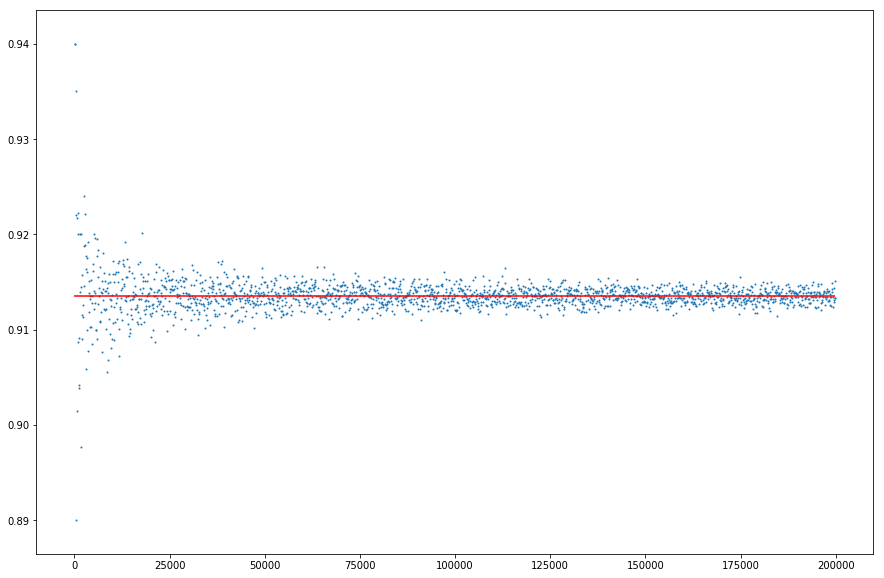

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(sample_sizes, probas, s=1)
plt.hlines(exact_solution(nb_faculties, rejection_chance), 0, max(sample_sizes), colors='r')

In [15]:
probas

[]